In [1]:
%matplotlib inline

In [2]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale = 1./255, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               rotation_range = 20, 
                               shear_range = 0.3, 
                               zoom_range = 0.3, 
                               horizontal_flip = True, 
                               preprocessing_function=preprocess_input, 
                               validation_split=0.2)

input_size = (224, 224)
train_generator = generator.flow_from_directory("./data/generator",
                                                target_size=input_size,
                                                batch_size=32,
                                                class_mode="categorical",
                                                subset='training')

valid_generator = generator.flow_from_directory("./data/generator",
                                                target_size=input_size,
                                                batch_size=32,
                                                class_mode="categorical",
                                                subset='validation')


Using TensorFlow backend.


Found 22618 images belonging to 10 classes.
Found 5648 images belonging to 10 classes.


W0807 13:56:52.952512 139813218862912 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0807 13:56:54.389285 139813218862912 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0807 13:56:55.696066 139813218862912 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0807 13:56:56.222594 139813218862912 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0807 13:56:57.275509 139813218862912 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0807 13:56:58.587697 139813218862912 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0807 13:56:59.732781 139813

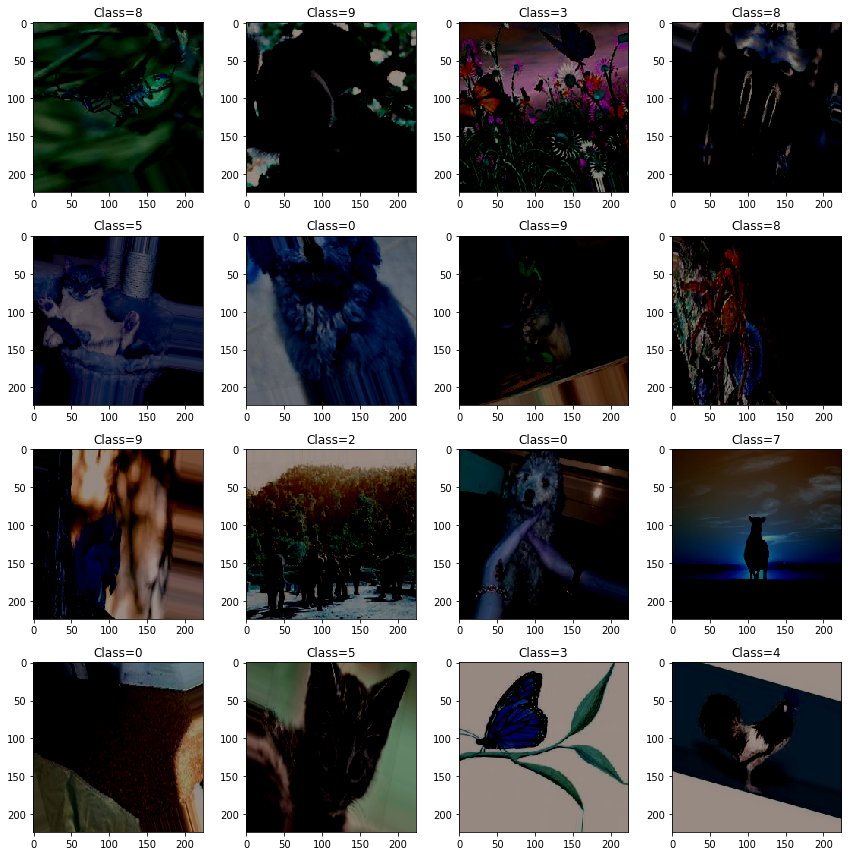

In [3]:
import numpy as np
import matplotlib.pylab as plt

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
for ax in axs.flatten():
    img, label = train_generator.next()
    cls = np.argmax(label[0], axis=0)

    ax.imshow(img[0])
    ax.set_title("Class=%d" % cls)
    
plt.tight_layout()
plt.show()
    

In [7]:
from keras.applications.resnet50 import ResNet50

from keras import backend as K

from keras import layers
from keras.models import Model
from keras.optimizers import SGD

NUM_CLASSES = 10

K.clear_session()

inputs = layers.Input(shape=(input_size[0], input_size[1], 3))
x = layers.Conv2D(32, (3, 3))(inputs)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Activation("relu")(x)

x = layers.Flatten()(x)

x = layers.Dense(32, activation="relu", kernel_initializer="he_uniform")(x)
x = layers.Dense(16, activation="relu", kernel_initializer="he_uniform")(x)
output = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=inputs, outputs=output)

opt = SGD(lr=0.0001, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()


W0807 13:59:41.710558 139813218862912 deprecation_wrapper.py:119] From /home/david.sullivan/anaconda3/envs/keras/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
activation_1 (Activation)    (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12616736  
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
__________

In [8]:
from keras.callbacks import EarlyStopping

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


nb_train_samples = 4125
nb_validation_samples = 466 
batch_size = 16
epochs = 50

model.fit_generator(
                train_generator,
                samples_per_epoch = nb_train_samples,
                epochs = epochs,
                validation_data = valid_generator,
                nb_val_samples = nb_validation_samples,
                callbacks = [early])


/home/david.sullivan/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/david.sullivan/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, validation_data=<keras_pre..., callbacks=[<keras.ca..., steps_per_epoch=128, validation_steps=466)`
W0807 13:59:43.874483 139813218862912 deprecation.py:323] From /home/david.sullivan/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_suppo

Epoch 1/50
  4/128 [..............................] - ETA: 4:05 - loss: 2.3010 - acc: 0.1016

KeyboardInterrupt: 